In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

# **Loading Data**

In [97]:
train_data = pd.read_csv(r"C:\Users\Apoorv\OneDrive\Desktop\MLProject\train_data.csv")
test_data = pd.read_csv(r"C:\Users\Apoorv\OneDrive\Desktop\MLProject\test_data.csv")

In [98]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

In [99]:
train_data.shape

(12379, 31)

In [100]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      5305 non-null   object
 1   income_range                          5305 non-null   object
 2   no_visited_Cold drinks                5215 non-null   object
 3   travelled_more_than_15mins_for_offer  5305 non-null   int64 
 4   Restaur_spend_less_than20             5244 non-null   object
 5   Marital Status                        5305 non-null   object
 6   restaurant type                       5305 non-null   object
 7   age                                   5305 non-null   object
 8   Prefer western over chinese           5305 non-null   int64 
 9   travelled_more_than_25mins_for_offer  5305 non-null   int64 
 10  travelled_more_than_5mins_for_offer   5305 non-null   int64 
 11  no_visited_bars               

In [101]:
train_data.head(10)

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No
5,10hours,Less than ₹12500,4~8,1,gt8,Divorced,Take-away restaurant,50plus,1,0,...,1,0,0,40,less1,22,Spring,Location C,0,Yes
6,2days,Less than ₹12500,less1,1,1~3,Single,Cold drinks,below21,0,0,...,0,0,0,89,never,7,Spring,Location C,0,Yes
7,2days,₹50000 - ₹62499,never,1,1~3,Married partner,Restaurant with pub,50plus,0,0,...,1,1,0,40,less1,10,Summer,Location B,0,No
8,10hours,₹12500 - ₹24999,less1,1,less1,Single,Restaurant with pub,41,1,0,...,1,1,1,89,never,7,Summer,Location C,0,No
9,10hours,₹75000 - ₹87499,4~8,1,1~3,Married partner,4 star restaurant,41,1,0,...,1,1,0,67,less1,22,Winter,Location B,0,Yes


In [102]:
test_data.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,2days,₹37500 - ₹49999,1~3,1,1~3,Divorced,Take-away restaurant,50plus,0,1,...,Sales & Related,1,1,4,89,less1,7,Summer,Location C,0
1,10hours,₹25000 - ₹37499,4~8,0,1~3,Unmarried partner,Cold drinks,21,1,0,...,Computer & Mathematical,1,1,0,67,less1,18,Summer,Location A,1
2,2days,₹100000 or More,never,1,never,Single,Cold drinks,21,1,0,...,Unemployed,1,0,4,67,never,7,Summer,Location C,0
3,2days,₹25000 - ₹37499,never,1,1~3,Married partner,Restaurant with pub,41,0,0,...,Unemployed,1,1,0,40,less1,18,Spring,Location C,1
4,10hours,₹12500 - ₹24999,never,0,1~3,Single,2 star restaurant,31,1,0,...,Unemployed,0,0,0,89,1~3,18,Summer,Location B,1


In [103]:
test_data.shape

(5305, 30)

# **Exploratory Data Analysis**

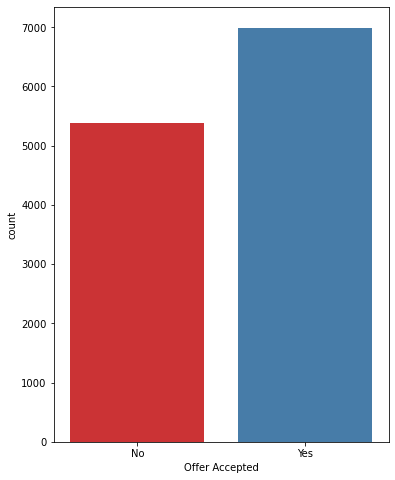

In [104]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Offer Accepted", data= train_data, palette="Set1")
plt.show()

In [105]:
offeracceptedperc = (train_data['Offer Accepted'].value_counts('Yes'))/12379

In [106]:
train_data['Offer Accepted'].value_counts(1)*100

Yes    56.498909
No     43.501091
Name: Offer Accepted, dtype: float64

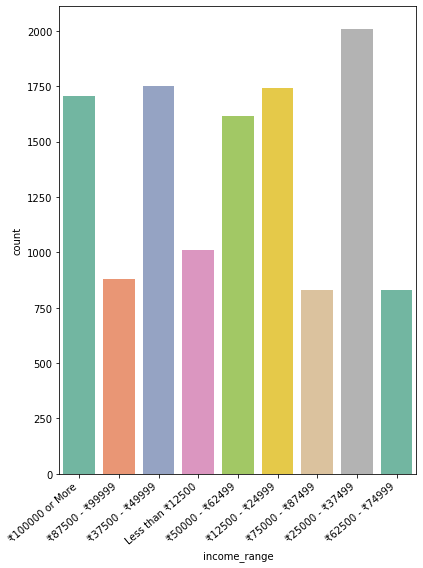

In [107]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="income_range", data= train_data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

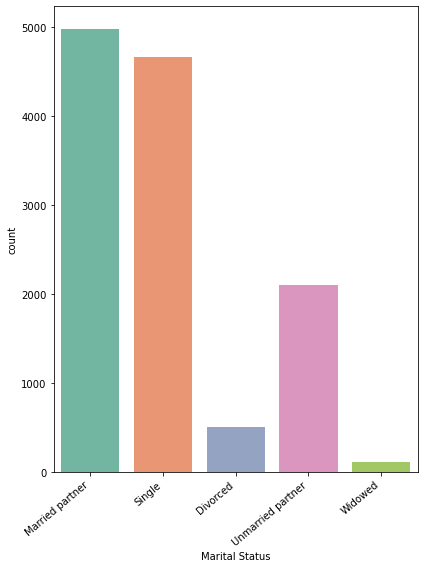

In [108]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Marital Status", data= train_data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

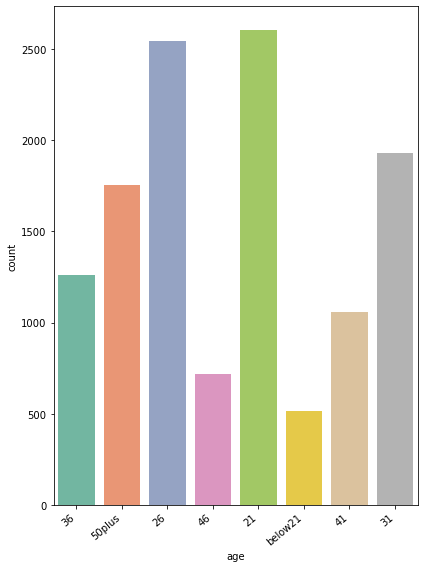

In [109]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="age", data= train_data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

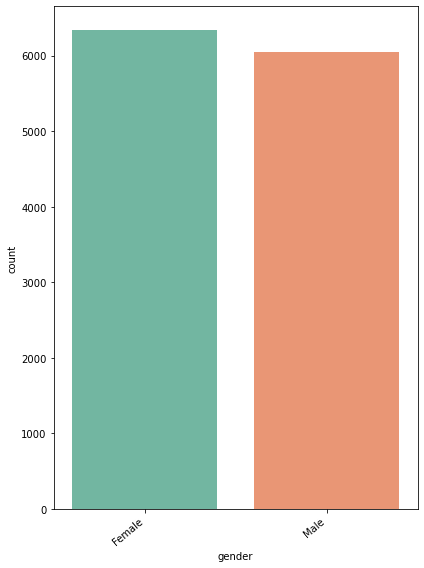

In [110]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="gender", data= train_data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

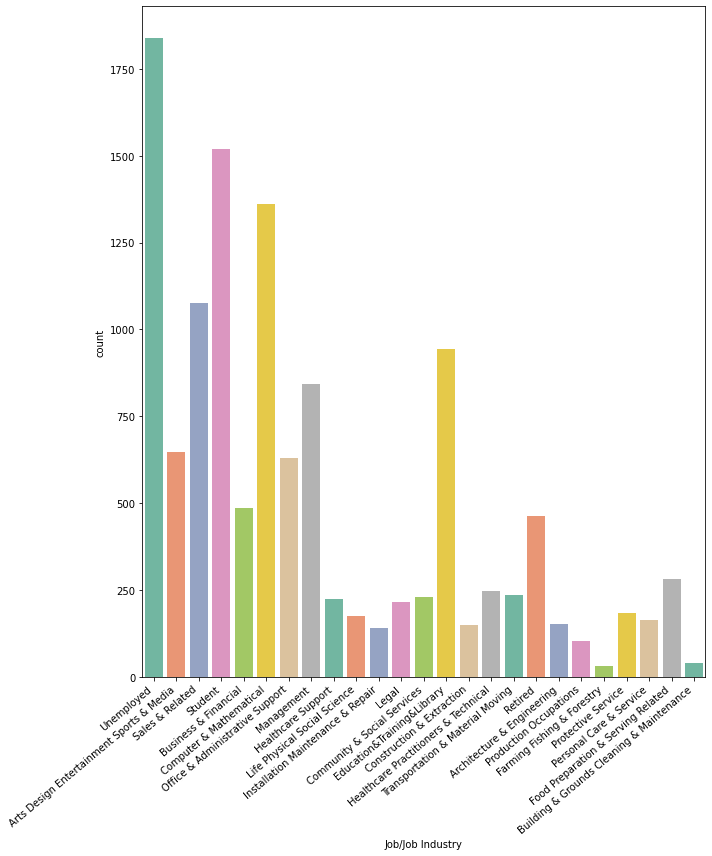

In [111]:
f, ax = plt.subplots(figsize=(10, 12))
ax = sns.countplot(x="Job/Job Industry", data= train_data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

> **Grouping Offer Accepted by Gender**

In [112]:
offer_by_gender = train_data.groupby(['gender','Offer Accepted']).size()
offer_by_gender = pd.DataFrame(offer_by_gender)
offer_by_gender

0
gender Offer Accepted      
Female No              2843
       Yes             3492
Male   No              2542
       Yes             3502

In [113]:
print("Number of Females who accept offer:")
((offer_by_gender.loc['Female'][0][1])/(offer_by_gender.loc['Female'][0][1]+offer_by_gender.loc['Female'][0][0]))*100

Number of Females who accept offer:


55.1223362273086

In [114]:
print("Number of Males who accept offer:")
((offer_by_gender.loc['Male'][0][1])/(offer_by_gender.loc['Male'][0][1]+offer_by_gender.loc['Male'][0][0]))*100

Number of Males who accept offer:


57.94176042356055

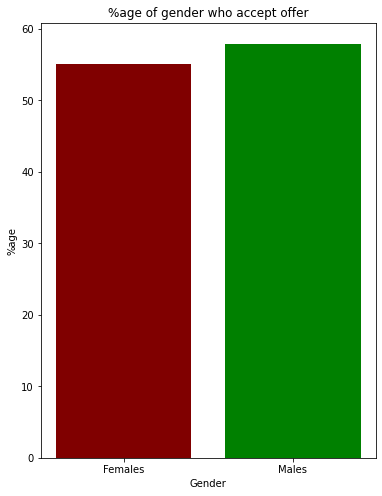

In [115]:
fig = plt.figure(figsize = (6, 8))
plt.bar(['Females','Males'],[55.12,57.94], color = ['maroon','green'])
plt.xlabel("Gender")
plt.ylabel("%age")
plt.title("%age of gender who accept offer")
plt.show()

> **Grouping by Income Range**

In [116]:
offer_by_income = train_data.groupby(['income_range','Offer Accepted']).size()
offer_by_income = pd.DataFrame(offer_by_income)

In [117]:
perc_accepted_income = []
for i in range(1,18,2):
    perc_accepted_income.append(((offer_by_income[0][i])/(offer_by_income[0][i]+offer_by_income[0][i-1]))*100)

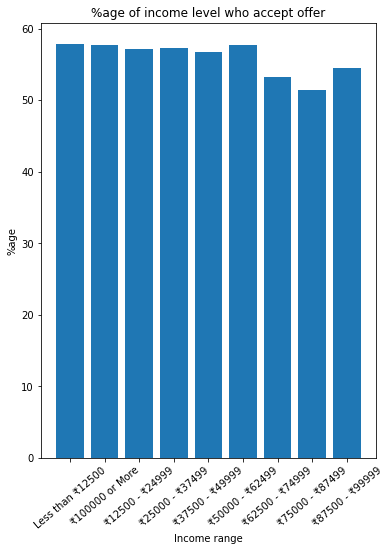

In [118]:
fig = plt.figure(figsize = (6, 8))
plt.bar(sorted(train_data['income_range'].unique()),perc_accepted_income)
plt.xlabel("Income range")
plt.ylabel("%age")
plt.title("%age of income level who accept offer")
plt.xticks(rotation=40)
plt.show()

In [119]:
ll = sorted(train_data['income_range'].unique())
for i in range(9):
    print(ll[i], " :",perc_accepted_income[i])

Less than ₹12500  : 57.905138339920946
₹100000 or More  : 57.73739742086753
₹12500 - ₹24999  : 57.20022948938611
₹25000 - ₹37499  : 57.3134328358209
₹37500 - ₹49999  : 56.7351598173516
₹50000 - ₹62499  : 57.69944341372912
₹62500 - ₹74999  : 53.196622436670694
₹75000 - ₹87499  : 51.445783132530124
₹87500 - ₹99999  : 54.43181818181818


> **grouping by Marital Status**

In [120]:
offer_by_marriage = train_data.groupby(['Marital Status','Offer Accepted']).size()
offer_by_marriage = pd.DataFrame(offer_by_marriage)

In [121]:
perc_accepted_marriage = []
for i in range(1,10,2):
    perc_accepted_marriage.append(((offer_by_marriage[0][i])/(offer_by_marriage[0][i]+offer_by_marriage[0][i-1]))*100)

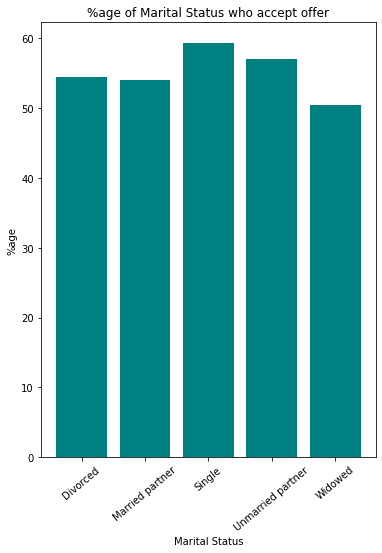

In [122]:
fig = plt.figure(figsize = (6, 8))
plt.bar(sorted(train_data['Marital Status'].unique()),perc_accepted_marriage, color = 'teal')
plt.xlabel("Marital Status")
plt.ylabel("%age")
plt.title("%age of Marital Status who accept offer")
plt.xticks(rotation=40)
plt.show()

> **Grouping by Job**

In [123]:
offer_by_job = train_data.groupby(['Job/Job Industry','Offer Accepted']).size()
offer_by_job = pd.DataFrame(offer_by_job)

In [124]:
perc_accepted_job = []
for i in range(1,48,2):
    perc_accepted_job.append(((offer_by_job[0][i])/(offer_by_job[0][i]+offer_by_job[0][i-1]))*100)

In [125]:
job_accept_list = sorted(train_data['Job/Job Industry'].unique())
result = zip(job_accept_list,perc_accepted_job)
result = dict(result)
for i,j in result.items():
    print(i," :", j)

Architecture & Engineering  : 67.97385620915033
Arts Design Entertainment Sports & Media  : 54.643962848297214
Building & Grounds Cleaning & Maintenance  : 65.85365853658537
Business & Financial  : 58.0246913580247
Community & Social Services  : 51.73913043478261
Computer & Mathematical  : 54.95958853783982
Construction & Extraction  : 58.666666666666664
Education&Training&Library  : 51.80084745762712
Farming Fishing & Forestry  : 46.875
Food Preparation & Serving Related  : 54.092526690391466
Healthcare Practitioners & Technical  : 63.82113821138211
Healthcare Support  : 66.3677130044843
Installation Maintenance & Repair  : 49.28571428571429
Legal  : 51.85185185185185
Life Physical Social Science  : 56.00000000000001
Management  : 58.313539192399055
Office & Administrative Support  : 57.84469096671949
Personal Care & Service  : 53.333333333333336
Production Occupations  : 63.46153846153846
Protective Service  : 58.46994535519126
Retired  : 46.96969696969697
Sales & Related  : 56.55813

# **Feature Engineering**

**Finding null values**

In [126]:
train_data.isnull().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

In [127]:
train_data = train_data.drop(['car'], axis = 1)
test_data = test_data.drop(['car'], axis = 1)

**Changing data types from object to int64/float**

In [128]:
offer_expiration_dict = {'10hours':0,'2days': 1}
train_data['offer expiration'] = train_data['offer expiration'].map(offer_expiration_dict)
test_data['offer expiration'] = test_data['offer expiration'].map(offer_expiration_dict)

In [129]:
income_level_dict = {'₹100000 or More':100000, '₹87500 - ₹99999':93749.5, '₹37500 - ₹49999':43749.5,
       'Less than ₹12500':12500, '₹50000 - ₹62499':56249.5, '₹12500 - ₹24999':18749.5,
       '₹75000 - ₹87499':81249.5, '₹25000 - ₹37499':31249.5, '₹62500 - ₹74999':68749.5}
train_data['income_range'] = train_data['income_range'].map(income_level_dict)
test_data['income_range'] = test_data['income_range'].map(income_level_dict)

In [130]:
no_visited_Cold_drinks_dict = {'less1': 0, 'never': 0, '1~3': 2, '4~8': 6, 'gt8': 8}
train_data['no_visited_Cold drinks'] = train_data['no_visited_Cold drinks'].map(no_visited_Cold_drinks_dict)
test_data['no_visited_Cold drinks'] = test_data['no_visited_Cold drinks'].map(no_visited_Cold_drinks_dict)

In [131]:
Restaur_spend_less_than20_dict = {'less1': 0, 'never': 0, '1~3': 2, '4~8': 6, 'gt8': 8}
train_data['Restaur_spend_less_than20'] = train_data['Restaur_spend_less_than20'].map(Restaur_spend_less_than20_dict)
test_data['Restaur_spend_less_than20'] = test_data['Restaur_spend_less_than20'].map(Restaur_spend_less_than20_dict)

In [132]:
Marital_Status_dict = dict()
for i in train_data['Marital Status'].unique():
    Marital_Status_dict[i] = list(train_data['Marital Status'].unique()).index(i)
train_data['Marital Status'] = train_data['Marital Status'].map(Marital_Status_dict)
test_data['Marital Status'] = test_data['Marital Status'].map(Marital_Status_dict)

In [133]:
age_dict = {'36': 36, '50plus': 50, '26': 26, '46': 46, '21': 21, 'below21': 21, '41': 41, '31': 31}
train_data['age'] = train_data['age'].map(age_dict)
test_data['age'] = test_data['age'].map(age_dict)

In [134]:
no_visited_bars_dict = {'less1': 0, 'never': 0, '1~3': 2, '4~8': 6, 'gt8': 8}
train_data['no_visited_bars'] = train_data['no_visited_bars'].map(no_visited_bars_dict)
test_data['no_visited_bars'] = test_data['no_visited_bars'].map(no_visited_bars_dict)

In [135]:
gender_dict = {'Male': 0, 'Female': 1}
train_data['gender'] = train_data['gender'].map(gender_dict)
test_data['gender'] = test_data['gender'].map(gender_dict)

In [136]:
customer_type_dict = dict()
for i in train_data['Customer type'].unique():
    customer_type_dict[i] = list(train_data['Customer type'].unique()).index(i)
train_data['Customer type'] = train_data['Customer type'].map(customer_type_dict)
test_data['Customer type'] = test_data['Customer type'].map(customer_type_dict)

In [137]:
qualification_dict = dict()
for i in train_data['Qualification'].unique():
    qualification_dict[i] = list(train_data['Qualification'].unique()).index(i)
train_data['Qualification'] = train_data['Qualification'].map(qualification_dict)
test_data['Qualification'] = test_data['Qualification'].map(qualification_dict)

In [138]:
restaurant_type_dict = dict()
for i in train_data['restaurant type'].unique():
    restaurant_type_dict[i] = list(train_data['restaurant type'].unique()).index(i)
train_data['restaurant type'] = train_data['restaurant type'].map(restaurant_type_dict)
test_data['restaurant type'] = test_data['restaurant type'].map(restaurant_type_dict)

In [139]:
job_dict = dict()
for i in train_data['Job/Job Industry'].unique():
    job_dict[i] = list(train_data['Job/Job Industry'].unique()).index(i)
train_data['Job/Job Industry'] = train_data['Job/Job Industry'].map(job_dict)
test_data['Job/Job Industry'] = test_data['Job/Job Industry'].map(job_dict)

In [140]:
Restaur_spend_greater_than20_dict = {'less1': 0, 'never': 0, '1~3': 2, '4~8': 6, 'gt8': 8}
train_data['Restaur_spend_greater_than20'] = train_data['Restaur_spend_greater_than20'].map(Restaur_spend_greater_than20_dict)
test_data['Restaur_spend_greater_than20'] = test_data['Restaur_spend_greater_than20'].map(Restaur_spend_greater_than20_dict)

In [141]:
offer_dict = {'No': 0, 'Yes': 1}
train_data['Offer Accepted'] = train_data['Offer Accepted'].map(offer_dict)

In [142]:
climate_dict = {'Summer':0, 'Spring':1, 'Winter': 2}
train_data['Climate'] = train_data['Climate'].map(climate_dict)
test_data['Climate'] = test_data['Climate'].map(climate_dict)

In [143]:
location_dict = {'Location A':0, 'Location B':1, 'Location C': 2}
train_data['drop location'] = train_data['drop location'].map(location_dict)
test_data['drop location'] = test_data['drop location'].map(location_dict)

In [144]:
takeaway_dict = {'less1': 0, 'never': 0, '1~3': 2, '4~8': 6, 'gt8': 8}
train_data['no_Take-aways'] = train_data['no_Take-aways'].map(takeaway_dict)
test_data['no_Take-aways'] = test_data['no_Take-aways'].map(takeaway_dict)

In [145]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   offer expiration                      12379 non-null  int64  
 1   income_range                          12379 non-null  float64
 2   no_visited_Cold drinks                12181 non-null  float64
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64  
 4   Restaur_spend_less_than20             12258 non-null  float64
 5   Marital Status                        12379 non-null  int64  
 6   restaurant type                       12379 non-null  int64  
 7   age                                   12379 non-null  int64  
 8   Prefer western over chinese           12379 non-null  int64  
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64  
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64  
 11  no_visited_bars

In [146]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   offer expiration                      5305 non-null   int64  
 1   income_range                          5305 non-null   float64
 2   no_visited_Cold drinks                5215 non-null   float64
 3   travelled_more_than_15mins_for_offer  5305 non-null   int64  
 4   Restaur_spend_less_than20             5244 non-null   float64
 5   Marital Status                        5305 non-null   int64  
 6   restaurant type                       5305 non-null   int64  
 7   age                                   5305 non-null   int64  
 8   Prefer western over chinese           5305 non-null   int64  
 9   travelled_more_than_25mins_for_offer  5305 non-null   int64  
 10  travelled_more_than_5mins_for_offer   5305 non-null   int64  
 11  no_visited_bars  

**All columns are now int64/float dtype**

# **Data Preprocessing**

**Filling Missing Data**

In [147]:
train_data.isnull().sum()

offer expiration                          0
income_range                              0
no_visited_Cold drinks                  198
travelled_more_than_15mins_for_offer      0
Restaur_spend_less_than20               121
Marital Status                            0
restaurant type                           0
age                                       0
Prefer western over chinese               0
travelled_more_than_25mins_for_offer      0
travelled_more_than_5mins_for_offer       0
no_visited_bars                          93
gender                                    0
restuarant_same_direction_house           0
Cooks regularly                           0
Customer type                             0
Qualification                             0
is foodie                                 0
no_Take-aways                           144
Job/Job Industry                          0
restuarant_opposite_direction_house       0
has Children                              0
visit restaurant with rating (av

In [148]:
test_data.isnull().sum()

offer expiration                          0
income_range                              0
no_visited_Cold drinks                   90
travelled_more_than_15mins_for_offer      0
Restaur_spend_less_than20                61
Marital Status                            0
restaurant type                           0
age                                       0
Prefer western over chinese               0
travelled_more_than_25mins_for_offer      0
travelled_more_than_5mins_for_offer       0
no_visited_bars                          50
gender                                    0
restuarant_same_direction_house           0
Cooks regularly                           0
Customer type                             0
Qualification                             0
is foodie                                 0
no_Take-aways                            60
Job/Job Industry                          0
restuarant_opposite_direction_house       0
has Children                              0
visit restaurant with rating (av

In [149]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)

In [150]:
for i in train_data.columns:
    if train_data[i].isnull().sum() != 0:
        train_data[i] = imputer.fit_transform(np.array(train_data[i]).reshape(-1,1))

In [151]:
for i in test_data.columns:
    if test_data[i].isnull().sum() != 0:
        test_data[i] = imputer.fit_transform(np.array(test_data[i]).reshape(-1,1))

In [152]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   offer expiration                      12379 non-null  int64  
 1   income_range                          12379 non-null  float64
 2   no_visited_Cold drinks                12379 non-null  float64
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64  
 4   Restaur_spend_less_than20             12379 non-null  float64
 5   Marital Status                        12379 non-null  int64  
 6   restaurant type                       12379 non-null  int64  
 7   age                                   12379 non-null  int64  
 8   Prefer western over chinese           12379 non-null  int64  
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64  
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64  
 11  no_visited_bars

In [153]:
train_data.isnull().sum()

offer expiration                        0
income_range                            0
no_visited_Cold drinks                  0
travelled_more_than_15mins_for_offer    0
Restaur_spend_less_than20               0
Marital Status                          0
restaurant type                         0
age                                     0
Prefer western over chinese             0
travelled_more_than_25mins_for_offer    0
travelled_more_than_5mins_for_offer     0
no_visited_bars                         0
gender                                  0
restuarant_same_direction_house         0
Cooks regularly                         0
Customer type                           0
Qualification                           0
is foodie                               0
no_Take-aways                           0
Job/Job Industry                        0
restuarant_opposite_direction_house     0
has Children                            0
visit restaurant with rating (avg)      0
temperature                       

In [154]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   offer expiration                      5305 non-null   int64  
 1   income_range                          5305 non-null   float64
 2   no_visited_Cold drinks                5305 non-null   float64
 3   travelled_more_than_15mins_for_offer  5305 non-null   int64  
 4   Restaur_spend_less_than20             5305 non-null   float64
 5   Marital Status                        5305 non-null   int64  
 6   restaurant type                       5305 non-null   int64  
 7   age                                   5305 non-null   int64  
 8   Prefer western over chinese           5305 non-null   int64  
 9   travelled_more_than_25mins_for_offer  5305 non-null   int64  
 10  travelled_more_than_5mins_for_offer   5305 non-null   int64  
 11  no_visited_bars  

In [155]:
test_data.isnull().sum()

offer expiration                        0
income_range                            0
no_visited_Cold drinks                  0
travelled_more_than_15mins_for_offer    0
Restaur_spend_less_than20               0
Marital Status                          0
restaurant type                         0
age                                     0
Prefer western over chinese             0
travelled_more_than_25mins_for_offer    0
travelled_more_than_5mins_for_offer     0
no_visited_bars                         0
gender                                  0
restuarant_same_direction_house         0
Cooks regularly                         0
Customer type                           0
Qualification                           0
is foodie                               0
no_Take-aways                           0
Job/Job Industry                        0
restuarant_opposite_direction_house     0
has Children                            0
visit restaurant with rating (avg)      0
temperature                       

**All columns now have 0 null data points**

# **Exploratory Data Analysis 2**

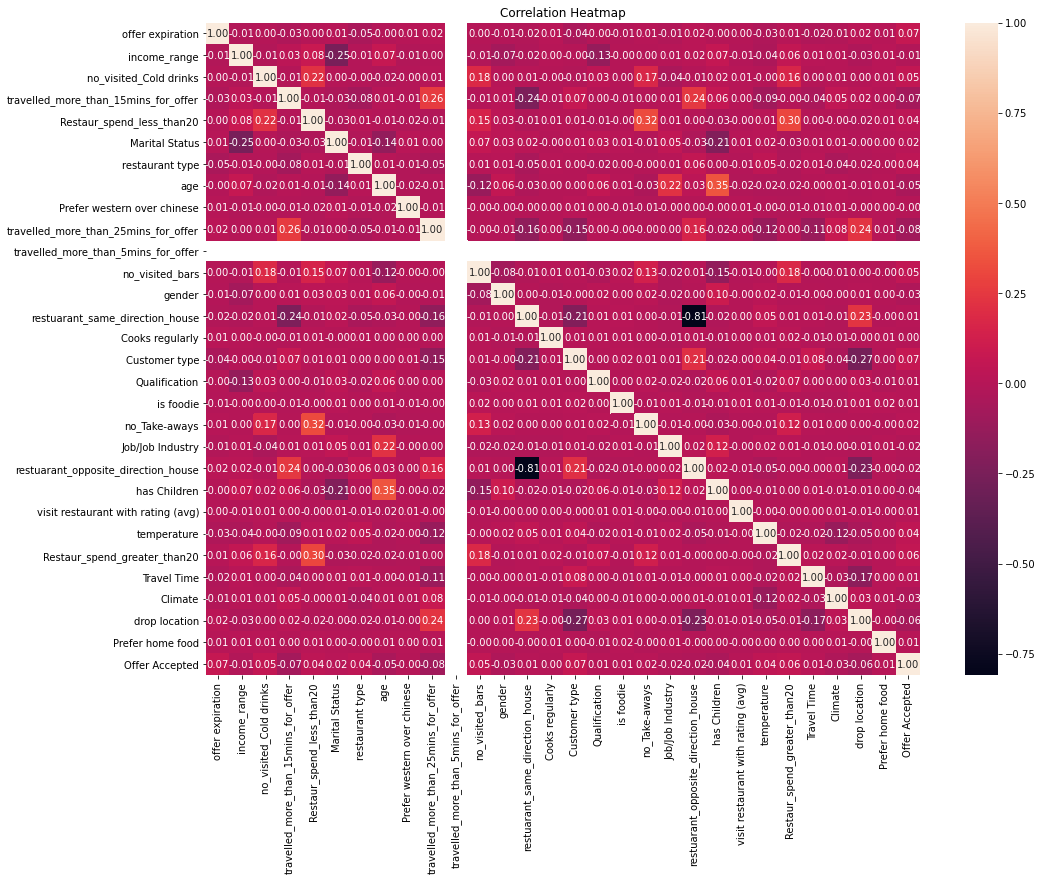

In [156]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap')
ax = sns.heatmap(train_data.corr(), annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
plt.show()

In [157]:
fields_correl = dict()
for i in train_data.columns:
    fields_correl[i] = ('%.2f' %train_data[i].corr(train_data['Offer Accepted']))
fields_correl

{'offer expiration': '0.07',
 'income_range': '-0.01',
 'no_visited_Cold drinks': '0.05',
 'travelled_more_than_15mins_for_offer': '-0.07',
 'Restaur_spend_less_than20': '0.04',
 'Marital Status': '0.02',
 'restaurant type': '0.04',
 'age': '-0.05',
 'Prefer western over chinese': '-0.00',
 'travelled_more_than_25mins_for_offer': '-0.08',
 'travelled_more_than_5mins_for_offer': 'nan',
 'no_visited_bars': '0.05',
 'gender': '-0.03',
 'restuarant_same_direction_house': '0.01',
 'Cooks regularly': '0.00',
 'Customer type': '0.07',
 'Qualification': '0.01',
 'is foodie': '0.01',
 'no_Take-aways': '0.02',
 'Job/Job Industry': '-0.02',
 'restuarant_opposite_direction_house': '-0.02',
 'has Children': '-0.04',
 'visit restaurant with rating (avg)': '0.01',
 'temperature': '0.04',
 'Restaur_spend_greater_than20': '0.06',
 'Travel Time': '0.01',
 'Climate': '-0.03',
 'drop location': '-0.06',
 'Prefer home food': '0.01',
 'Offer Accepted': '1.00'}

# **Data Preprocessing 2**

**Separating Features and Label**

In [158]:
y_train = train_data['Offer Accepted']
X_train = train_data.drop(['Offer Accepted'], axis = 1) 
X_test = test_data

**Scaling data using Standard Scaler**

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**All columns have mean = 0 and std dev = 1**

# **Fitting Models**

**Logistic Regression**

In [161]:
'''from sklearn.linear_model import LogisticRegression
np.random.seed(42)
lrclf = LogisticRegression(solver = 'sag', C = 0.01)
lrclf.fit(X_train,y_train)
lrclf.score(X_train,y_train)'''

"from sklearn.linear_model import LogisticRegression\nnp.random.seed(42)\nlrclf = LogisticRegression(solver = 'sag', C = 0.01)\nlrclf.fit(X_train,y_train)\nlrclf.score(X_train,y_train)"

In [162]:
'''lr_pred = lrclf.predict(X_test)'''

'lr_pred = lrclf.predict(X_test)'

> Logistic Regression CV

In [163]:
'''from sklearn.model_selection import RandomizedSearchCV'''

'from sklearn.model_selection import RandomizedSearchCV'

In [164]:
'''lgparam = {'C': [0.001,0.01,0.1,1,10,100,1000],
          'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}'''

"lgparam = {'C': [0.001,0.01,0.1,1,10,100,1000],\n          'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}"

In [165]:
'''lrcv = RandomizedSearchCV(lrclf, lgparam, random_state = 42)
lrcv.fit(X_train,y_train)
lrcv.best_params_'''

'lrcv = RandomizedSearchCV(lrclf, lgparam, random_state = 42)\nlrcv.fit(X_train,y_train)\nlrcv.best_params_'

**Support Vector Machine**

In [166]:
'''from sklearn.svm import SVC
np.random.seed(42)
svclf = SVC()
svclf.fit(X_train,y_train)
svclf.score(X_train,y_train)'''

'from sklearn.svm import SVC\nnp.random.seed(42)\nsvclf = SVC()\nsvclf.fit(X_train,y_train)\nsvclf.score(X_train,y_train)'

In [167]:
'''svc_pred = svclf.predict(X_test)'''

'svc_pred = svclf.predict(X_test)'

SVC CV

In [168]:
'''svcparam = {'C': [0.01,1,10,100,1000],
           #'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
           'degree': [3,5],
           'gamma': ['auto', 'scale']}'''

"svcparam = {'C': [0.01,1,10,100,1000],\n           #'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],\n           'degree': [3,5],\n           'gamma': ['auto', 'scale']}"

In [169]:
'''svccv = SVC(C = 0.01, degree = 3)
svccv.fit(X_train,y_train)
svccv.score(X_train,y_train)'''

'svccv = SVC(C = 0.01, degree = 3)\nsvccv.fit(X_train,y_train)\nsvccv.score(X_train,y_train)'

**K Nearest Neighbors**

In [170]:
'''from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
knnclf = KNeighborsClassifier()
knnclf.fit(X_train,y_train)
knnclf.score(X_train,y_train)'''

'from sklearn.neighbors import KNeighborsClassifier\nnp.random.seed(42)\nknnclf = KNeighborsClassifier()\nknnclf.fit(X_train,y_train)\nknnclf.score(X_train,y_train)'

**Decision Tree**

In [171]:
'''from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
dstclf = DecisionTreeClassifier()
dstclf.fit(X_train,y_train)
dstclf.score(X_train,y_train)'''

'from sklearn.tree import DecisionTreeClassifier\nnp.random.seed(42)\ndstclf = DecisionTreeClassifier()\ndstclf.fit(X_train,y_train)\ndstclf.score(X_train,y_train)'

In [172]:
'''dstclf_pred = dstclf.predict(X_test)'''

'dstclf_pred = dstclf.predict(X_test)'

**Random Forest**

In [173]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
rfclf = RandomForestClassifier()
rfclf.fit(X_train,y_train)
rfclf.score(X_train,y_train)

1.0

In [174]:
rfclf_pred = rfclf.predict(X_test)

> Random Forest CV

In [175]:
np.random.seed(42)
rfclfcv = RandomForestClassifier(max_depth = 20, n_estimators = 1500)
rfclfcv.fit(X_train,y_train)
rfclfcv.score(X_train,y_train)

1.0

In [176]:
rfclfcv_pred = rfclf.predict(X_test)

In [183]:
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(rfclfcv, pickle_out) 
pickle_out.close()

**Multi Layered Perceptron**

In [177]:
'''from sklearn.neural_network import MLPClassifier
np.random.seed(42)
mlpclf = MLPClassifier()
mlpclf.fit(X_train,y_train)
mlpclf.score(X_train,y_train)'''

'from sklearn.neural_network import MLPClassifier\nnp.random.seed(42)\nmlpclf = MLPClassifier()\nmlpclf.fit(X_train,y_train)\nmlpclf.score(X_train,y_train)'

In [178]:
'''mlpclf_pred = mlpclf.predict(X_test)'''

'mlpclf_pred = mlpclf.predict(X_test)'

**Gradient Boost**

In [179]:
'''from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)
gbclf = GradientBoostingClassifier()
gbclf.fit(X_train,y_train)
gbclf.score(X_train,y_train)'''

'from sklearn.ensemble import GradientBoostingClassifier\nnp.random.seed(42)\ngbclf = GradientBoostingClassifier()\ngbclf.fit(X_train,y_train)\ngbclf.score(X_train,y_train)'

**XG Boost**

In [180]:
'''from xgboost import XGBClassifier
np.random.seed(42)
xgbclf = XGBClassifier(n_estimators = 1000)
xgbclf.fit(X_train,y_train)
xgbclf.score(X_train,y_train)'''

'from xgboost import XGBClassifier\nnp.random.seed(42)\nxgbclf = XGBClassifier(n_estimators = 1000)\nxgbclf.fit(X_train,y_train)\nxgbclf.score(X_train,y_train)'

In [181]:
'''xgbclf_pred = xgbclf.predict(X_test)'''

'xgbclf_pred = xgbclf.predict(X_test)'

# **Creating Submission**

In [182]:
"""submission=pd.DataFrame(columns=['id','Offer Accepted'])
submission['id']=[i for i in range(len(X_test))]
submission['Offer Accepted']=[i for i in rfclfcv_pred]
offer_dict = {0: 'No', 1: 'Yes'}
submission['Offer Accepted'] = submission['Offer Accepted'].map(offer_dict)
submission.to_csv('submission.csv',index=False)"""

"submission=pd.DataFrame(columns=['id','Offer Accepted'])\nsubmission['id']=[i for i in range(len(X_test))]\nsubmission['Offer Accepted']=[i for i in rfclfcv_pred]\noffer_dict = {0: 'No', 1: 'Yes'}\nsubmission['Offer Accepted'] = submission['Offer Accepted'].map(offer_dict)\nsubmission.to_csv('submission.csv',index=False)"

# Insights

**Sample size of data set: 12,379\
Number of features used to determine acceptance of offer: 28\
Accuracy of Random Forest Classifier: 61.56%**
* 57.94% males accept the offer
* Samples falling in Income Range beloew 12,500 accept the offer the most with 57.90%
* Samples with marital status as "Single" are most likely to accept the offer
* Samples whose profession is Architecture and Engineering accept the offer the most with 67.97%

In [184]:
classifier.pkl

NameError: name 'classifier' is not defined